## Номер варінту

In [2]:
N = (16 + 4) % 5 + 1
print(N)

1


## Дані з файлу 

In [10]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')

## №1 
### Перші 8 рядків 

In [6]:
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


## №2 
### Останні 8 рядків

In [8]:
print(df.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


## №3 
### Імена стовпців набору даних

In [10]:
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


## №5 
### Кількість унікальних імен

In [15]:
unique_names_count = df['Name'].nunique()

print("Кількість унікальних імен у наборі даних:", unique_names_count)

Кількість унікальних імен у наборі даних: 93889


## №10 
### Кількість унікальних імен у кожному році

In [17]:
unique_names_by_year = df.groupby('Year')['Name'].nunique()

print(unique_names_by_year)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


## №11 
### Рік з найбільгою кількістью унікальних імен

In [20]:
max_unique_year = unique_names_by_year.idxmax()
max_unique_count = unique_names_by_year.max()

print("Рік:", max_unique_year)
print("Кількість:", max_unique_count)

Рік: 2008
Кількість: 32488


## №12 
### Найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [22]:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
most_unique_names_year = unique_names_per_year.idxmax()
most_popular_name_most_unique_year = df[df['Year'] == most_unique_names_year].groupby('Name')['Count'].sum().idxmax()
print(f"'{most_popular_name_most_unique_year}'")

'Jacob'


## №13 
### Рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих Імен

In [24]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
most_popular_row_jacob_female = jacob_female[jacob_female['Count'] == jacob_female['Count'].max()]
print(most_popular_row_jacob_female)

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


## №14 
### Рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [26]:
names_F = df[df['Gender'] == 'F'][['Name', 'Year']]
names_M = df[df['Gender'] == 'M'][['Name', 'Year']]
gender_neutral_names = pd.merge(names_F, names_M, on=['Name', 'Year'])
gender_neutral_names_by_year = gender_neutral_names['Year'].value_counts()
year_with_most_gender_neutral_names = gender_neutral_names_by_year.idxmax()
num_gender_neutral_names = gender_neutral_names_by_year.max()
gender_neutral_names_df = pd.DataFrame({
    'Year': [year_with_most_gender_neutral_names],
    'Gender_neutral_names': [num_gender_neutral_names]
})
gender_neutral_names_df.set_index('Year', inplace=True)

print(gender_neutral_names_df)

      Gender_neutral_names
Year                      
2008                  2557


## №15
### Загальна кількість народжень за рік.

In [28]:
total_births_by_year = df.groupby('Year')['Count'].sum()
total_births_by_year_df = total_births_by_year.reset_index()
total_births_by_year_df.set_index('Year', inplace=True)
print(total_births_by_year_df)

        Count
Year         
1880   201484
1881   192699
1882   221538
1883   216950
1884   243467
...       ...
2010  3686589
2011  3646730
2012  3643336
2013  3626802
2014  3670151

[135 rows x 1 columns]


## №16
### Загальна кількість народжень за рік.

In [30]:
year_with_most_births = total_births_by_year_df['Count'].idxmax()
print(year_with_most_births)

1957


## №17
### Кількість дівчаток та хлопчиків, які народились кожного року

In [32]:
births_by_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(births_by_year_gender)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


## №18
### Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

In [55]:
gender_counts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

years_with_more_girls = (gender_counts['F'] > gender_counts['M']).sum()

print(years_with_more_girls)

Кількість років, коли народжувалося більше дівчаток, ніж хлопчиків: 54


## №21
### Кількість разів коли хлопчиків називали Barbara

In [5]:
barbara_count_for_boys = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

print(barbara_count_for_boys)

4139


## №22
### Скільки років проводилось спостереження

In [4]:
min_year = df['Year'].min()
max_year = df['Year'].max()
num_years = max_year - min_year + 1
print(f"'Спостереження проводилось {num_years} років'")

'Спостереження проводилось 135 років'


## №22
### Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [19]:
name_counts_female = df[df['Gender'] == 'F'].groupby('Name')['Year'].nunique()
name_counts_male = df[df['Gender'] == 'M'].groupby('Name')['Year'].nunique()

common_names = name_counts_female[name_counts_female == df['Year'].nunique()].index.intersection(name_counts_male[name_counts_male == df['Year'].nunique()].index).tolist()

common_names_sorted = sorted(common_names)

for name in common_names:
    print(name)

Francis
James
Jean
Jesse
Jessie
John
Johnnie
Joseph
Lee
Leslie
Marion
Ollie
Robert
Sidney
Tommie
William


## №24
### Найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів)

In [20]:
average_count = df['Count'].mean()
unpopular_names = df[df['Count'] < average_count]
most_popular_unpopular_name = unpopular_names[unpopular_names['Count'] == unpopular_names['Count'].max()]
print(f"Найпопулярніше серед непопулярних імен - {most_popular_unpopular_name['Name'].values[0]}. Ним називали {most_popular_unpopular_name['Count'].values[0]} разів")

Найпопулярніше серед непопулярних імен - Allen. Ним називали 184 разів


## №26
### Графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

NameError: name 'plt' is not defined

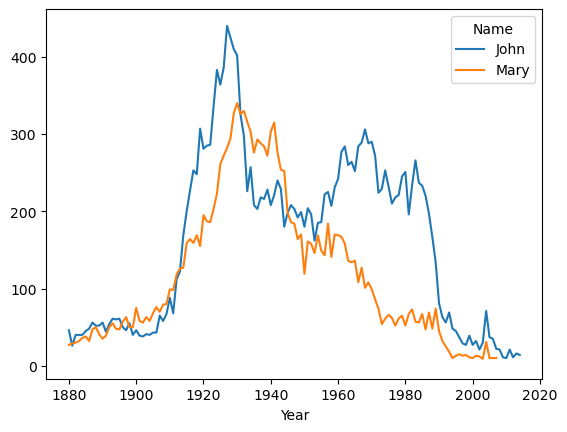

In [21]:
name_counts_by_year = df[((df['Name'] == 'John') & (df['Gender'] == 'F')) | ((df['Name'] == 'Mary') & (df['Gender'] == 'M'))].groupby(['Year', 'Name'])['Count'].sum().unstack()
name_counts_by_year.plot()
plt.show()